# Classificação Binária

In [24]:
import tensorflow as tf

import numpy as np

from tensorflow.keras import layers, models, preprocessing

## Augumentation - Alteração das caracteristicas das imagens

In [8]:
# 2000 imagens de gatos e 2000 de cães. É uma quantidade pequena de imagens. Utiliza-se o Augmentation para o treino ser feito
# em cada epoca com imagens diferentes das originais. Deste modo apesar de o treino ser feito com a mesma quantidade de imagens
# (2000) em cada epoca é utilizada uma versão diferente dessas imagens.

# Altera as imagens. As novas imagens são geradas a partir das existentes aplicando rotações, aumento do zoom, alteração da 
# direcção dos pixeis, etc.

# Augmentation não se refere ao processo de aumentar o número total de imagens. É o processo de criar diferentes variantes das
# imagens originais(aplicando rotações, zoom, etc.). As imagens geradas não são totalmente diferentes das originais mas uma
# transformação aleatoria delas.

### Transformações nas imagens

In [9]:
# rescale: fazer a normalização dos pixeis para que os seus valores variem entre 0 e 1 (O ImageDataGenerato pode ser utilizado
# apenas para fazer a normalização dos pixeis e manter as imagens originais(para não estar manualmente a importar as imagens e 
# dividir o se número de pixeis por 255).

# rotation_range: grau de rotação das imagens originais
# horizontal_flip: rotações horizontais
# shear_range: mudar a direcção dos pixeis
# height_shift_range: modificar a faixa de altura da imagem
# zoom_range: alterar o zoom da imagem

train_data_base_generator = preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=7, horizontal_flip=True, 
                                                                   shear_range=0.2, height_shift_range=0.07, zoom_range=0.2)

In [10]:
# Como não se utilizaram parâmetros não faz alterações na imagem. Mantem as imagens originais.
# Como as imagens de treino devem ser diferentes das imagens de teste(apenas devem ter a mesma escala) não é necessário fazer 
# alterações na base de dados de teste.
test_data_base_generator = preprocessing.image.ImageDataGenerator(rescale=1./255)

### Criar nova base de dados

In [18]:
# Criar um base de dados de treino a partir das imagens originais(X_train, y_train)

# Pode ser usado apenas para importar as imagens sem nenhuma alteração, para não se fazer a divisão em teste e treino 
# manualmente.

# batch_size: 32, calcula-se o erro de um conjunto de 32 dados e actualizam-se todos os pesos e escolhe-se um detector de 
# caracteristicas melhor. De seguida calcula-se o erro para o seguinte conjunto de 32 dados e actualizam-se todos os pesos e 
# escolhe-se um detector de caracteristicas melhor. E assim sucessivamente.

# target_size: tamanho das imagens(igual ao definido na rede neural).
# class_mode: binary para problemas de classificação binária.

train_data_base = train_data_base_generator.flow_from_directory("dataset/training_set",target_size=(64,64), batch_size=32,
                                                               class_mode="binary")

Found 4000 images belonging to 2 classes.


In [19]:
test_data_base = test_data_base_generator.flow_from_directory("dataset/test_set",target_size=(64,64), batch_size=32,
                                                               class_mode="binary")

Found 1000 images belonging to 2 classes.


## Modelo CNN com 2 camadas de convolução e 1 camada oculta

In [20]:
# sequential - uma cada apos a outra
# dense - camadas fully conected, cada neuronio esta conectado a todos os neuronios da camada seguinte

#------------------------------------------------------------------------------------------------------------------------------

# Camada de convolução (conv2D porque é uma imagem):

# Existem imagens com dimensões diferentes. Optou-se por utilizar a dimensão 64x64 pixeis para todas as imagens (todas as 
# imagens têm de ter as mesmas dimensões para a rede neural aplicar os calculos matemáticos).

# Operador de convolução: multiplicação da imagem(matriz de pixeis 64x64) por um detector de caracteristicas, feature detection
# ou filtro ou kernel(matriz normalmente 3x3 para imagens pequenas) que vai originar um mapa de caracteristicas.
# Este mapa tem como objectivo filtrar(detectar) as caracteristicas mais importantes da imagem. 

# Detectores de caracteristicas:32, Utilizam-se 32 matrizes de detectores de caraceristicas que vão originar 32 mapas de
# caracteristicas. Estes detectores de caracteristicas são originados variando os números da matriz até se obter aquele que 
# apresenta o melhor resultado. O recomendado é utilizar 64 kernels e seus multiplos(128, 256, 512, 1024, etc).

# Kernel_size: (3,3) matriz detectora de caracteristicas do tamanho 3x3 

# strider: (1,1) Os valores do mapa de caracteristicas são obtidos com a subdivisão da matriz da imagem a fazer-se movendo um 
# pixel para a direita e um pixel para baixo.

# input_shape: dimensões da imagem e número de canais(1 para imagens sem cor e 3 para imagens com cor)

# função de activação: Aplica a função relu(transforma valores negativos em zero e mantem os restantes iguais) ao mapa de 
# caracteristicas. Isto permite detectar melhor os padrões(Transforma os pontos mais escuros(com valores negativos) em pontos 
# mais claros e mais parecidos com os restantes pontos).

#---------------------------------------------------------------------------------------------------------------------------
# Camada de Normalização
# A normalização dos já foi feita anteriormente para a camada de entrada(com X_train/255 e X_test/255). Essa normalização tambem
# pode ser feita para as camadas de convoluções, a normalização é feita no mapa de caracteristicas onde todos os valores passam 
# a estar entre 0 e 1. 
# Isto faz com que o processamento do algoritmo seja mais rapido.

#-------------------------------------------------------------------------------------------------------------------------------

# Camada de Pooling
# O mapa de caracteristicas é percorrido por uma matriz(neste caso 2x2) para encontrar os valores maiores
# (caracteristicas mais importantes) e formar um nova matriz com esses valores(Poolin matrix).  
# Os valores da matriz de pooling são obtidos com a subdivisão do mapa de caracteristicas a fazer-se movendo uma coluna para a
# direita e uma coluna para baixo.
# Como neste caso tem-se 32 mapas de caracteristicas tem-se igual número de matrizes de pooling.

# Utiliza-se o Max Pooling para se obter o maior valor e assim realçar as caracteristicas principais da imagem. (tambem se podia
# utilizar a média ou o minimo valor).

# pool_size: (2,2) tamanho da matriz utilizada para seleccionar as carateristicas do mapa de caracteristicas. Vai originar uma
# matriz pooling.

#---------------------------------------------------------------------------------------------------------------------------
# Camada de Flattening

# Transformar a matriz de pooling num vector que irá ser utilizado na camada de entrada da rede neural densa.
# Os valores dos neuronios da camada de entrada da rede neural serão os valores desse vector.
#---------------------------------------------------------------------------------------------------------------------------

# 1ª camada oculta
# número de neuronios para primeira modelação:
# Optou-se por colocar 128 neuronios.

#---------------------------------------------------------------------------------------------------------------------------
# Camada Dropout
# Ajuda a prevenir o overfitting(que em redes neurais convolucionais tem grande probabilidade de acontecer devido aos muitos
# parametros que se utilizam).
# Coloca-se zeros em alguns valores/neuronios da camada de entrada de forma aleatoria. Escolhe-se a quantidade/percentagem de 
# neuronios que terão valor zero. Ao se colocar o valor zero estes neuronios não teram influencia no modelo. Normalmente 
# utiliza-se uma percentagem entre 20% a 30%. Se for demasiado elevado(maior que 50%) o modelo pode entrar em underfitting, 
# porque não consegue aprender, pois tem demasiadas entradas que não são consideradas.
# Como se utilizam menos variaveis é mais dificil haver alguma que não tenham sido treinada e que o modelo não consiga prever.

#--------------------------------------------------------------------------------------------------------------------------

# Camada de Saida
# Neuronios: Igual ao número de saidas possiveis, para classificação binária normalmente utiliza-se 1. Considera-se o resultado 
# obtido ser da classe A se for 0 (<0.5) e 1 (>=0.5) é considerado classe B (no caso de se usar a função sigmoid nesta camada).
# Função de activação: Sigmoid porque é um problema de classificação binário que varia entre 0 e 1, e esta função retorna sempre
# um valor entre 0 e 1.
#------------------------------------------------------------------------------------------------------------------------------


model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=(64, 64, 3), activation="relu")) # 1ª camada de convolução e definição da camada
model.add(layers.BatchNormalization())                                          # de entrada
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(32, (3,3), activation="relu")) # 2ª camada de convolução
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten()) # funciona como camada de entrada da rede neural oculta

model.add(layers.Dense(units=128, activation="relu")) # 1ª camada de oculta
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=1, activation="sigmoid")) # camada de saida

## Compilação e Ajuste do modelo CNN

In [21]:
# Compilação do modelo
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [22]:
# Em vez do model.fit() utiliza-se o model.fit_generator()

#-------------------------------------------------------------------------------------------------------------------------------

# epochs: Quantas vezes(iterações) se ajustam os valores de todos os pesos e escolhe-se um detector de carateristicas melhor. 
# Ou seja quantas vezes se faz o treino dos dados com os valores dos pesos a serem melhorados e a escolher-se(mudar-se) o 
# detector de caracteristicas.

# 1ª epoca- calcula o erro para os primeiros 32 dados e actualiza os pesos. Calcula o o erro para os 32 dados seguintes e 
# actualiza os pesos. E assim sucessivamente. Actualiza-se(muda-se) o detector de caracteristica no fim desta época.
# 2ª epoca- calcula o erro para os primeiros 32 dados(com os pesos da 1ª epoca) e actualiza os pesos. Calcula o o erro para os
# 32 dados seguintes(com os pesos da 1ª epoca) e actualiza-se os pesos. E assim sucessivamente. Actualiza-se(muda-se) o
# detector de caracteristica no fim desta época.

# 4000/32 = 125 batchs. Os pesos e o detector de caracteristicas são actualizados 125 vezes em cada epoca.

#-------------------------------------------------------------------------------------------------------------------------------

# steps_per_epoch: 4000/32 = 125
# Número de iterações por epoca. Garante que apenas as primerias 125 amostras(batchs) são consideradas. É util quando se tem um
# conjunto de dados demasiado grande para ser processado.
# 1ª epoca: calcula o erro para os primeiros 32 dados e actualiza os pesos (O detector de caracteristicas só é actualizado
# no fim de cada época). Calcula o o erro para os 32 dados seguintes e actualiza os pesos.
# E assim sucessivamente até terem sido realizadas 125 iterações. Ou seja apenas se consideraram as primeiras 4000
# imagens.
# Assim as 4000 imagens originais são transformadas por epoca. 

# Com o steps_per_epoch=n_samples/batch_size em cada epoca cada amostra é transformada apenas uma vez e portanto neste caso
# vão ser geradas 4000 imagens transformadas a cada epoca. Essas imagens vão ser as usadas para se fazer o treino. Na proxima
# epoca uma nova transformação aleatoria das 4000 imagens é feita e o treino é feito com essas imagens tranformadas.
# Ou seja não se está a aumentar o número de imagens de treino de 4000 para um número maior, mas a fazer o treino em 4000
# imagens que são transformadas de epoca para epoca.

# Por exemplo na primeira epoca a 1ª imagem orinal é transformada aleatoriamente e faz-se o treino com base nessa transformação.
# Na segunda epoca a 1ª imagem orinal volta a ser transformada aleatoriamente e faz-se o treino com base nessa transformação.
# E assim sucessivamente.
# Para 5 epocas cada imagem é transformada 5 vezes.

# Não faz sentido alterar o steps_per_epoch=n_samples/batch_size para um valor diferente.
# Por exemplo ao se escolher o steps_per_epoch=2x(n_samples/batch_size) para aumentar o número de transformações que uma imagem
# sofre por epoca(de 1 transformação para 2). Esta-se a fazer com que cada epoca seja 2 epocas normais. Ou seja, deveria-se
# aumentar o númemro de epocas e não o steps_per_epoch.

#-------------------------------------------------------------------------------------------------------------------------------

#validation_steps: Semelhante ao steps_per_epoch mas aplicado ao conjunto de dados de teste.

#-------------------------------------------------------------------------------------------------------------------------------

# Validation data: Avaliação do modelo utilizando a base de dados de teste (val_accuracy).

# Ajustar os dados de entrada de treino aos dados de saida para treinar o modelo(Estão os dois na base de dados de treino).
model.fit_generator(train_data_base, steps_per_epoch=4000/32, epochs=4, validation_data=test_data_base, 
                    validation_steps=1000/32)

Epoch 1/4


W0705 13:26:33.273961  7780 deprecation.py:323] From C:\Users\Bruno\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


125/125 [==============================] - 117s 936ms/step - loss: 0.8126 - accuracy: 0.6040 - val_loss: 2.4947 - val_accuracy: 0.5000
Epoch 2/4
125/125 [==============================] - 100s 804ms/step - loss: 0.6346 - accuracy: 0.6405 - val_loss: 1.3341 - val_accuracy: 0.5730
Epoch 3/4
125/125 [==============================] - 114s 914ms/step - loss: 0.5979 - accuracy: 0.6862 - val_loss: 0.8414 - val_accuracy: 0.6190
Epoch 4/4
125/125 [==============================] - 92s 739ms/step - loss: 0.5754 - accuracy: 0.7007 - val_loss: 0.8850 - val_accuracy: 0.6380


## Previsão de uma imagem

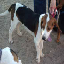

In [84]:
# Importar uma imagem de teste
image_test = preprocessing.image.load_img("dataset/test_set/cachorro/dog.3500.jpg", target_size=(64,64))
image_test

In [85]:
# Converter o formato da imagem de Image para array
image_test = preprocessing.image.img_to_array(image_test)
image_test.shape

(64, 64, 3)

In [86]:
# Normalização dos pixeis
image_test = image_test/255

In [87]:
# Adicionar uma nova dimenção ao array com a imagem

# 1º parâmetro: número de imagens
# 2º parâmetro: Altura da imagem (nº de pixeis da imagem na vertical).
# 3º parâmetro: Largura da imagem (nº de pixeis da imagem na horizontal).
# 4º parâmetro: Escala rgb: 1 para escala de cinzentos.

image_test = np.expand_dims(image_test, axis = 0)
image_test.shape

(1, 64, 64, 3)

In [88]:
# Probabilidade da imagem pertencer à classe 1 ou classe 0.
# Como é um problema de classificação binária(utilizou-se a função sigmoid) quanto mas proximo do 1 estiver a previsão maior
# é a probabilidade da imagem pertencer à classe 1.
result = model.predict(image_test)
result

array([[0.37488317]], dtype=float32)

In [89]:
# Ver os indices da base de dados de treino
train_data_base.class_indices

{'cachorro': 0, 'gato': 1}

In [90]:
# Função com as classes das imagens

# Definiu-se o 0.5 como barreira para pertencer à classe 0 ou classe 1. Esta barreira deve ser modificada quando por exemplo
# se trata da administração de medicamentos com efeitos secundários perigosos por exemplo abaixo de 0.99 pertence à classe 0 e
# o medicamento não deve ser receitado.

def name():
    if result < 0.5:
        print("Cão")
    if result >= 0.5:
        print("Gato")

In [91]:
# Previsão do objecto na imagem
name()

Cão
